# EDA e Criação de um modelo de classificação para o Dataset Attrition Employee

In [127]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Avisos
warnings.filterwarnings("ignore") # Ignorar avisos

In [128]:
# Importar dataset e visualizar as primeiras linhas

df = pd.read_csv(r'C:\Users\rayners\Desktop\Datasets\Employee Atrittion\train.csv')
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [129]:
# Visualizar as colunas

df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [130]:
# Visualizar a quantidade de linhas e colunas do dataset

df.shape

(59598, 24)

In [131]:
# Visulizar as informações de colunas nulas e tipo dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [132]:
# Drop coluna employee ID

df.drop('Employee ID',axis=1,inplace=True)

In [133]:
# Visualizar os dado pós drop do ID

df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [134]:
# Visualizar dados estatísticos das variáveis númericas

df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [135]:
# Criar um novo Df incluíndo apenas as colunas númericas

df2 = df.select_dtypes(include='int64')
df2.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
0,31,19,5390,2,22,0,89
1,59,4,5534,3,21,3,21
2,24,10,8159,0,11,3,74
3,36,7,3989,1,27,2,50
4,56,41,4821,0,71,0,68


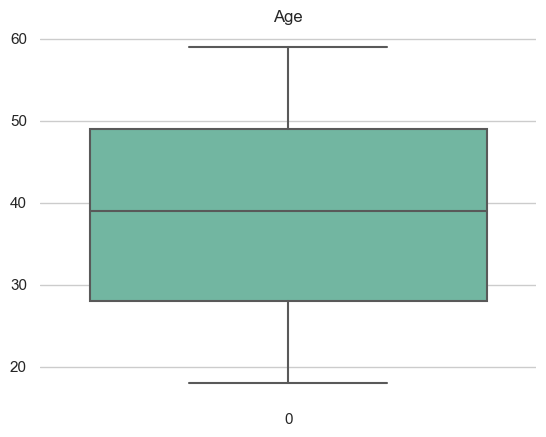

<Figure size 400x400 with 0 Axes>

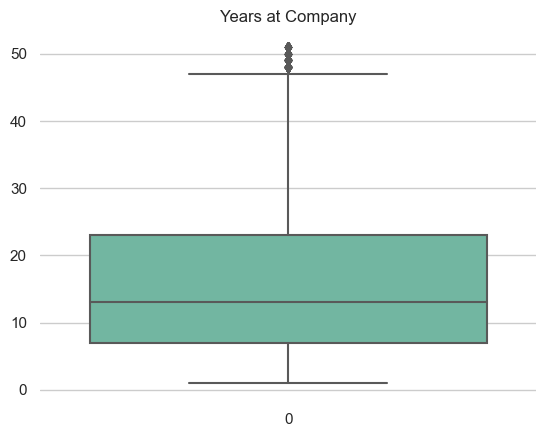

<Figure size 400x400 with 0 Axes>

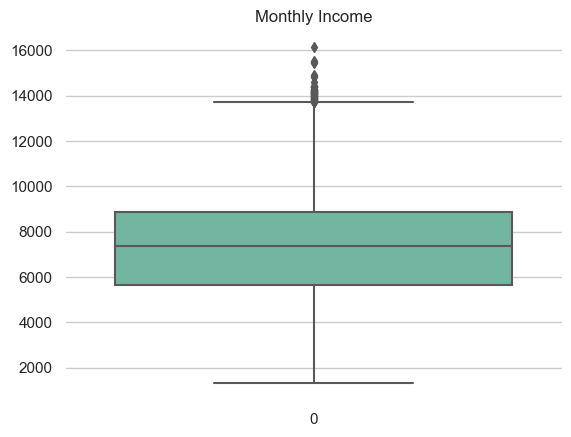

<Figure size 400x400 with 0 Axes>

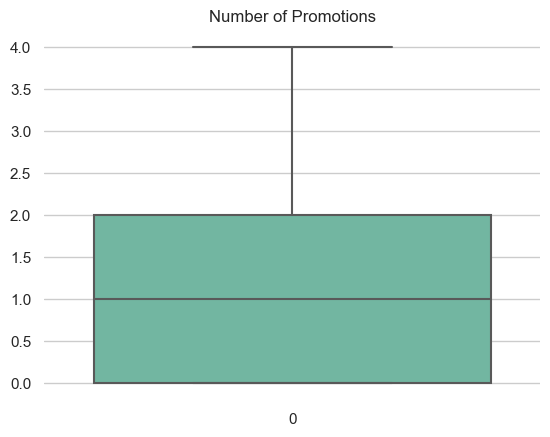

<Figure size 400x400 with 0 Axes>

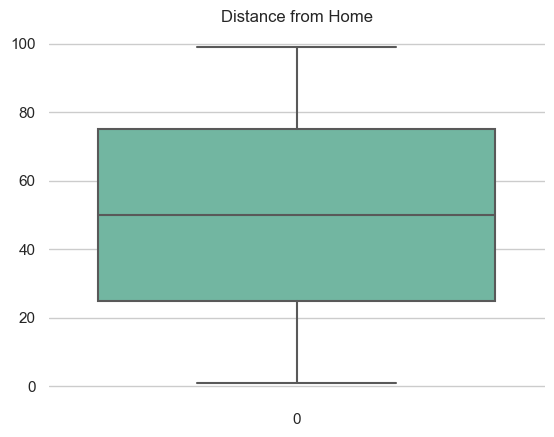

<Figure size 400x400 with 0 Axes>

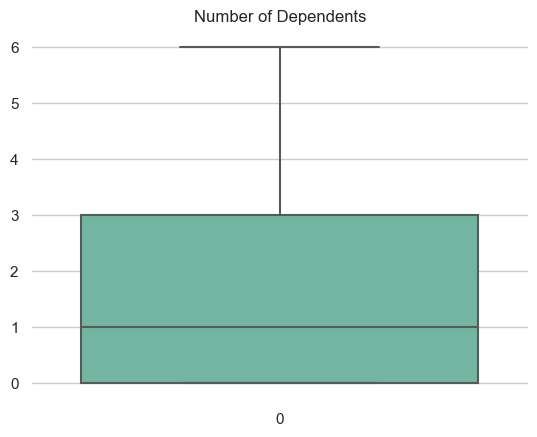

<Figure size 400x400 with 0 Axes>

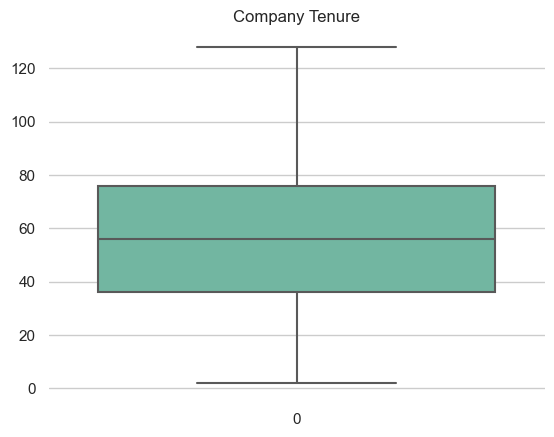

<Figure size 400x400 with 0 Axes>

In [136]:
# Visualizar as colunas númericas em Boxplot

for column in df2.columns:
    sns.boxplot(df2[column], palette="Set2")
    sns.set(style="whitegrid")
    sns.despine(left=True, bottom=True)
    plt.title(column)
    plt.figure(figsize=(4,4))
    plt.show()

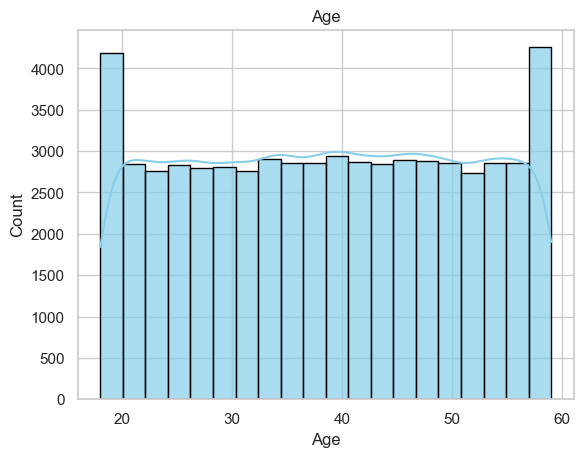

<Figure size 400x400 with 0 Axes>

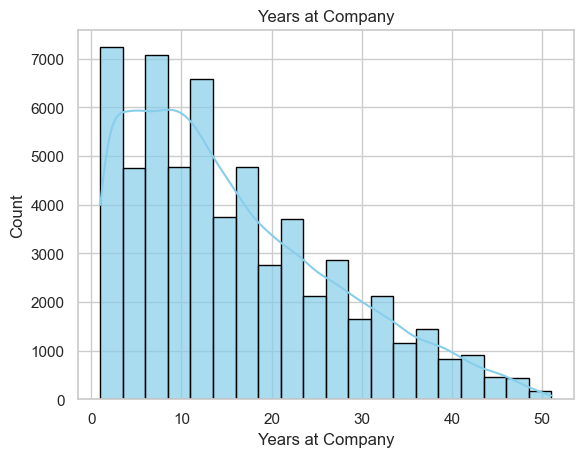

<Figure size 400x400 with 0 Axes>

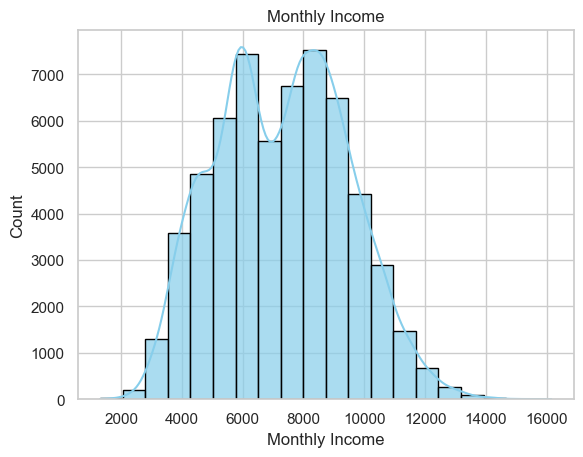

<Figure size 400x400 with 0 Axes>

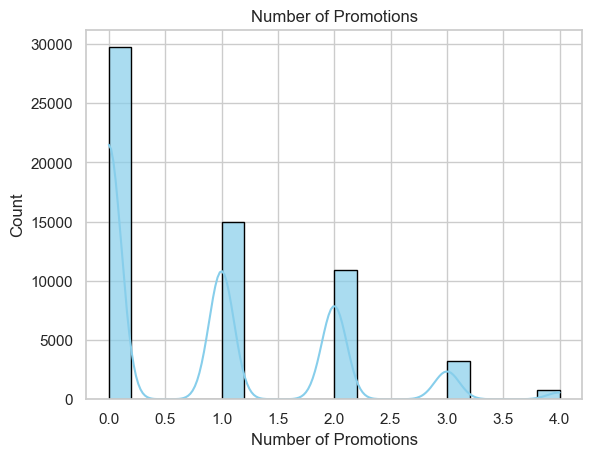

<Figure size 400x400 with 0 Axes>

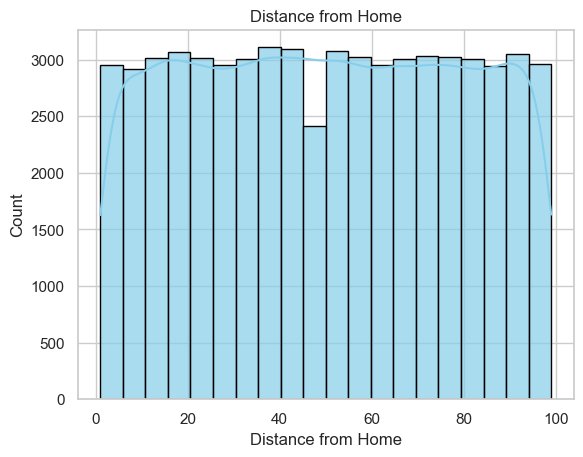

<Figure size 400x400 with 0 Axes>

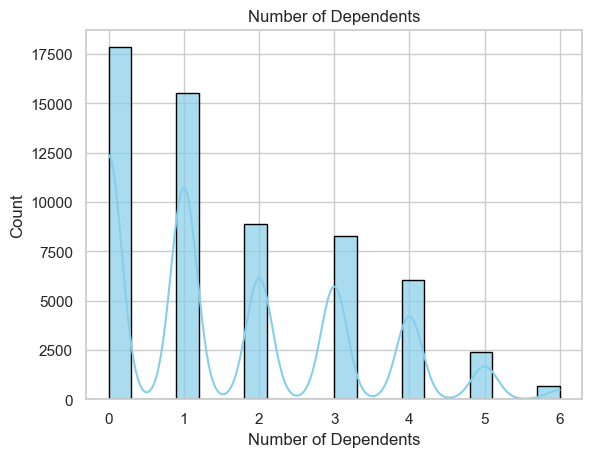

<Figure size 400x400 with 0 Axes>

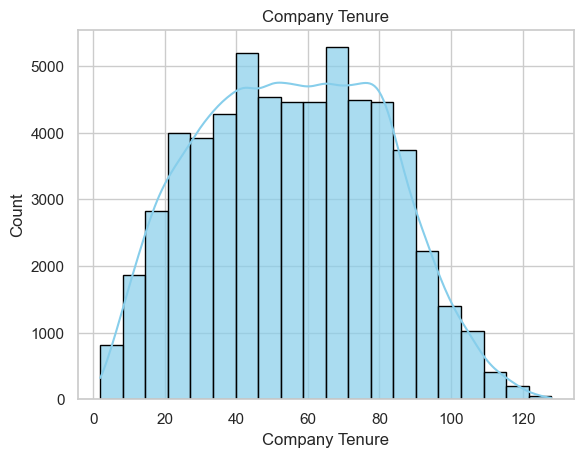

<Figure size 400x400 with 0 Axes>

In [137]:
# Visualizar as variáveis númericas em Histograma

for column in df2.columns:
    sns.histplot(df2[column], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
    sns.set(style="whitegrid")
    plt.title(column)
    plt.figure(figsize=(4,4))
    plt.show()

In [138]:
# Analisar a quantidade de Funcionários que Permaneceram (Stayed) e Saíram (Left) da empresa

df['Attrition'].value_counts()

Stayed    31260
Left      28338
Name: Attrition, dtype: int64

In [139]:
# Analisar o percentual de clientes que Permaneceram na empresa

porcentagem_stayed = df[df['Attrition'] == "Stayed"].value_counts().sum() / df['Attrition'].value_counts().sum() * 100
porcentagem_stayed = round(porcentagem_stayed,2)
print(porcentagem_stayed)

52.45


In [140]:
# Criar uma coluna com as idades agrupadas em 5 faixas

bins = [18,31,41,51,61] # Limite dos grupos
labels = ['18 - 30','31 - 40','41 - 50','51 - 61'] # Rótulos dos grupos

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df[['Age', 'Age Group']].head())


   Age Age Group
0   31   31 - 40
1   59   51 - 61
2   24   18 - 30
3   36   31 - 40
4   56   51 - 61


In [141]:
# Analisar a porcentagem de funcionários que permaneceram na empresa

total_por_faixa_idade = df['Age Group']. value_counts().sort_index()

Stayed_por_faixa_idade = df[df['Attrition'] == 'Stayed']['Age Group'].value_counts().sort_index()

Stayed_porcentagem_por_faixa_idade = (Stayed_por_faixa_idade / total_por_faixa_idade) * 100

print(round(Stayed_porcentagem_por_faixa_idade),2)

18 - 30    48.0
31 - 40    55.0
41 - 50    54.0
51 - 61    54.0
Name: Age Group, dtype: float64 2


In [142]:
# Porcentagem de funcionários por faixa de idade

df['Age Group'].value_counts() / df['Age'].value_counts().sum() * 100

18 - 30    30.581563
41 - 50    24.081345
31 - 40    24.029330
51 - 61    21.307762
Name: Age Group, dtype: float64

In [143]:
# Analisar a variável Job Satisfaction e a probalidade do funcionário deixar a empresa

left_por_job_satisfaction = df[df['Attrition'] == 'Left']['Job Satisfaction'].value_counts().sort_index()

total_por_job_satisfaction = df['Job Satisfaction'].value_counts()

Porcentagem_left_por_job_satisfaction = left_por_job_satisfaction / total_por_job_satisfaction * 100

print(round(Porcentagem_left_por_job_satisfaction),2)

High         45.0
Low          52.0
Medium       45.0
Very High    53.0
Name: Job Satisfaction, dtype: float64 2


In [144]:
# Analisar qual a taxa de atrito da variável Remote Work e a probalidade do funcionário deixar a empresa

Stayed_por_remote_work = df[df['Attrition'] == 'Stayed']['Remote Work'].value_counts().sort_index()

total_por_remote_work = df['Remote Work'].value_counts()

Porcentagem_stayed_por_job_satisfaction = Stayed_por_remote_work / total_por_remote_work * 100

print(round(Porcentagem_stayed_por_job_satisfaction),2)

No     47.0
Yes    75.0
Name: Remote Work, dtype: float64 2


In [145]:
# Criar uma coluna binária da variável attrition

df['Attrition_Binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Left' else 0) # Criando uma coluna binária da variável attrition
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Age Group,Attrition_Binary
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Medium,89,No,No,No,Excellent,Medium,Stayed,31 - 40,0
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Medium,21,No,No,No,Fair,Low,Stayed,51 - 61,0
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Medium,74,No,No,No,Poor,Low,Stayed,18 - 30,0
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Small,50,Yes,No,No,Good,Medium,Stayed,31 - 40,0
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Medium,68,No,No,No,Fair,Medium,Stayed,51 - 61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,Female,12,Education,4414,Fair,High,Average,1,Yes,...,Small,35,No,No,Yes,Poor,Very High,Left,41 - 50,1
59594,18,Male,4,Healthcare,8040,Fair,High,High,3,No,...,Medium,73,No,No,No,Fair,Medium,Left,18 - 30,1
59595,22,Female,14,Technology,7944,Fair,High,High,0,Yes,...,Small,29,No,Yes,No,Good,Medium,Stayed,18 - 30,0
59596,23,Male,8,Education,2931,Fair,Very High,Average,0,No,...,Large,9,No,No,No,Good,Low,Left,18 - 30,1


In [146]:
# Qual a correlação entre Monthly Income (Renda Mensal) e o atrito

income_attrition = df[['Monthly Income','Attrition_Binary']]
corr = income_attrition.corr()
corr

,Monthly Income,Attrition_Binary
Monthly Income,1.000000,-0.011377
Attrition_Binary,-0.011377,1.000000


In [147]:
# Analisar a variável Education Level e a probalidade do funcionário deixar a empresa

left_por_education_level = df[df['Attrition'] == 'Left']['Education Level'].value_counts().sort_index()

total_por_education_level = df['Education Level'].value_counts()

Porcentagem_left_por_education_level = left_por_education_level / total_por_education_level * 100

print(round(Porcentagem_left_por_education_level),2)

Associate Degree     48.0
Bachelor’s Degree    49.0
High School          48.0
Master’s Degree      49.0
PhD                  25.0
Name: Education Level, dtype: float64 2


In [148]:
# Analisar a média de salário por Education Level

df.groupby('Education Level')['Monthly Income'].mean()

Education Level
Associate Degree     7322.457124
Bachelor’s Degree    7292.325087
High School          7301.942543
Master’s Degree      7294.806323
PhD                  7294.945613
Name: Monthly Income, dtype: float64

In [149]:
# Analisar a média de anos na companhia por Education Level

df.groupby('Education Level')['Years at Company'].mean()

Education Level
Associate Degree     15.702514
Bachelor’s Degree    15.758387
High School          15.697055
Master’s Degree      15.780449
PhD                  16.089026
Name: Years at Company, dtype: float64

In [150]:
# Analisar se a quantidade de promoções tem menor probabilidade do funcionário sair da empresa

left_por_number_promotions = df[df['Attrition'] == 'Left']['Number of Promotions'].value_counts().sort_index()

total_por_number_promotions = df['Number of Promotions'].value_counts()

Porcentagem_left_por_number_promotions = left_por_number_promotions / total_por_number_promotions * 100

print(round(Porcentagem_left_por_number_promotions),2)

0    49.0
1    49.0
2    49.0
3    25.0
4    23.0
Name: Number of Promotions, dtype: float64 2


In [151]:
# Analisar a relação entre work life balance e a probabilidade do funcionário sair da empresa

left_por_work_life_balance = df[df['Attrition'] == 'Left']['Work-Life Balance'].value_counts().sort_index()

total_por_work_life_balance = df['Work-Life Balance'].value_counts()

Porcentagem_left_por_work_life_balance = left_por_work_life_balance / total_por_work_life_balance * 100

print(round(Porcentagem_left_por_work_life_balance),2)

Excellent    36.0
Fair         57.0
Good         41.0
Poor         60.0
Name: Work-Life Balance, dtype: float64 2


In [152]:
# Analisar a relação entre reputação da empresa e a probabilidade do funcionário sair da empresa

left_por_company_reputation = df[df['Attrition'] == 'Left']['Company Reputation'].value_counts().sort_index()

total_por_company_reputation = df['Company Reputation'].value_counts()

Porcentagem_left_por_company_reputation = left_por_company_reputation / total_por_company_reputation * 100

print(round(Porcentagem_left_por_company_reputation),2)

Excellent    44.0
Fair         52.0
Good         43.0
Poor         56.0
Name: Company Reputation, dtype: float64 2


In [153]:
# Analisar a relação entre oportunidades de liderança e a probabilidade do funcionário sair da empresa

left_por_leadership_opportunities = df[df['Attrition'] == 'Left']['Leadership Opportunities'].value_counts().sort_index()

total_por_leadership_opportunities = df['Leadership Opportunities'].value_counts()

Porcentagem_left_por_leadership_opportunities = left_por_leadership_opportunities / total_por_leadership_opportunities * 100

print(round(Porcentagem_left_por_leadership_opportunities),2)

No     48.0
Yes    45.0
Name: Leadership Opportunities, dtype: float64 2


In [154]:
# Análise descritiva da variável Distance From Home

df['Distance from Home'].describe()

count    59598.000000
mean        50.007651
std         28.466459
min          1.000000
25%         25.000000
50%         50.000000
75%         75.000000
max         99.000000
Name: Distance from Home, dtype: float64

In [155]:
# Criar uma coluna com as distâncias agrupadas em 5 faixas

bins = [0,11,31,51,71,100] # Limite dos grupos
labels = ['1 - 10','11 - 30','31 - 50','51 - 70','71 - 99'] # Rótulos dos grupos

df['Distance From Home Group'] = pd.cut(df['Distance from Home'], bins=bins, labels=labels, right=False)

print(df[['Distance from Home', 'Distance From Home Group']].head())

   Distance from Home Distance From Home Group
0                  22                  11 - 30
1                  21                  11 - 30
2                  11                  11 - 30
3                  27                  11 - 30
4                  71                  71 - 99


In [156]:
# Analisar a porcentagem de funcionários que permaneceram na empresa

total_por_Distance_from_home_group = df['Distance From Home Group']. value_counts().sort_index()

Stayed_por_faixa_distance = df[df['Attrition'] == 'Stayed']['Distance From Home Group'].value_counts().sort_index()

Stayed_porcentagem_Distance_from_home_group = (Stayed_por_faixa_distance / total_por_Distance_from_home_group) * 100

print(round(Stayed_porcentagem_Distance_from_home_group),2)

1 - 10     58.0
11 - 30    58.0
31 - 50    58.0
51 - 70    47.0
71 - 99    47.0
Name: Distance From Home Group, dtype: float64 2


In [157]:
df2

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
0,31,19,5390,2,22,0,89
1,59,4,5534,3,21,3,21
2,24,10,8159,0,11,3,74
3,36,7,3989,1,27,2,50
4,56,41,4821,0,71,0,68
...,...,...,...,...,...,...,...
59593,50,12,4414,1,66,2,35
59594,18,4,8040,3,42,0,73
59595,22,14,7944,0,34,2,29
59596,23,8,2931,0,62,0,9


In [158]:
# Analisar correlação das variáveis númericas

corr_df2 = df2.corr()
corr_df2

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Age,1.000000,0.539806,-0.001989,0.000167,-0.007063,0.002927,0.237048
Years at Company,0.539806,1.000000,-0.005288,-0.000229,-0.006888,0.003973,0.442180
Monthly Income,-0.001989,-0.005288,1.000000,0.006418,-0.002528,0.002582,-0.005397
Number of Promotions,0.000167,-0.000229,0.006418,1.000000,-0.007882,-0.000558,0.003903
Distance from Home,-0.007063,-0.006888,-0.002528,-0.007882,1.000000,0.000659,-0.005595
Number of Dependents,0.002927,0.003973,0.002582,-0.000558,0.000659,1.000000,0.001600
Company Tenure,0.237048,0.442180,-0.005397,0.003903,-0.005595,0.001600,1.000000


<Axes: >

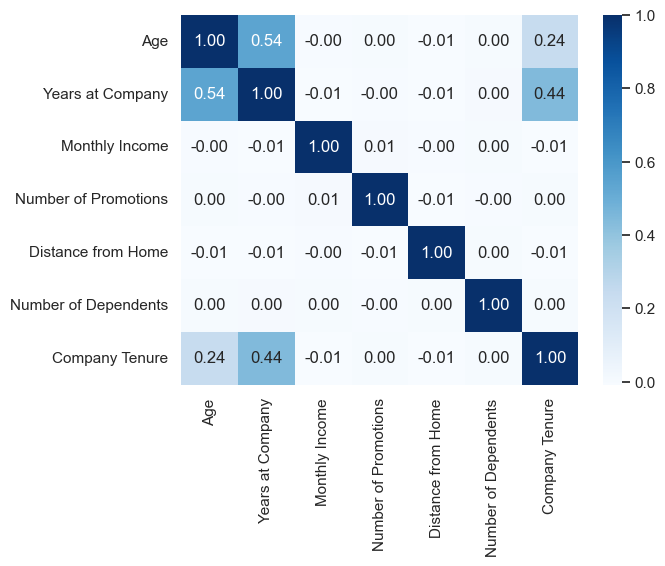

In [159]:
# Análise correlação utilizando heatmap

sns.heatmap(corr_df2,cmap='Blues',annot=True,fmt='.2f')

In [160]:
# Drop colunas criadas de agrupamento para os próximos passos de Normalização e codificação dos dados

df3 = df.drop(['Age Group','Attrition_Binary','Distance From Home Group'], axis=1)
df3

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,Female,12,Education,4414,Fair,High,Average,1,Yes,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,18,Male,4,Healthcare,8040,Fair,High,High,3,No,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,22,Female,14,Technology,7944,Fair,High,High,0,Yes,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,23,Male,8,Education,2931,Fair,Very High,Average,0,No,...,0,Entry,Large,9,No,No,No,Good,Low,Left


In [161]:
# Importar bibliotecas para Padronização e codificação dos dados e criação do modelo de regressão logistica.

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [162]:
# Separar features e target

X_train = df3.drop(columns=['Attrition'])
y_train = df3['Attrition']

In [163]:
# Identificar colunas categóricas e colunas númericas

categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64','float64']).columns

In [164]:
# Codificar variáveis categóricas

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_train_processed = pd.concat([X_train.reset_index(drop=True).drop(columns=categorical_features),X_train_encoded_df], axis=1)

In [165]:
# Normalizar variáveis númericas

scaler = StandardScaler()
X_train_processed[numerical_features] = scaler.fit_transform(X_train_processed[numerical_features])

In [166]:
# Treinar o modelo de Regressão Logística

model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000)

In [167]:
# Import o dataset de test

df_test = pd.read_csv(r'C:\Users\rayners\Desktop\Datasets\Employee Atrittion\test.csv')

In [187]:
# Drop Coluna Employee Id

df_test.drop('Employee ID',axis=1,inplace=True)

In [188]:
# Separar features e target do dataset de teste

X_test = df_test.drop(columns=['Attrition'])
y_test = df_test['Attrition']


In [189]:
# Identificar colunas categóricas e colunas númericas do dataset de test

categorical_features_test = X_test.select_dtypes(include=['object']).columns
numerical_features_test = X_test.select_dtypes(include=['int64','float64']).columns

In [190]:
# Codificar variáveis categóricas do dataset de Test

encoder = OneHotEncoder(drop='first', sparse=False)
X_test_encoded = encoder.fit_transform(X_test[categorical_features])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_processed = pd.concat([X_test.reset_index(drop=True).drop(columns=categorical_features),X_test_encoded_df], axis=1)

In [191]:
# Normalizar variáveis númericas

scaler = StandardScaler()
X_test_processed[numerical_features] = scaler.fit_transform(X_test_processed[numerical_features])

In [193]:
# Fazer previsões nos dados de teste

y_pred = model.predict(X_test_processed)


In [194]:
# Avaliar o modelo

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

        Left       0.74      0.74      0.74      7032
      Stayed       0.77      0.77      0.77      7868

    accuracy                           0.76     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.76      0.76      0.76     14900



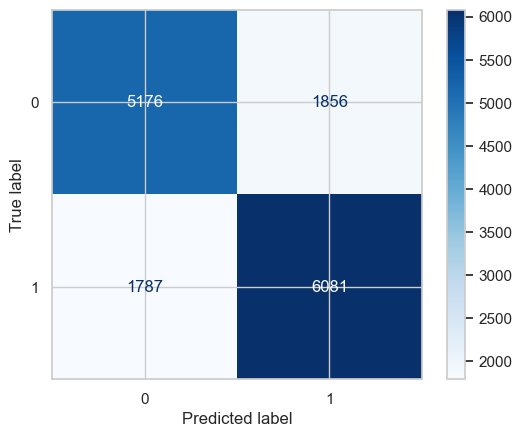

In [195]:
# Matriz de confusão

mc = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=mc)
disp.plot(cmap='Blues')
plt.show()